In [ ]:
For this project, I will choose the first question to base my data analyses off of. I have also made a new question that I will be exploring. This project will explore how played hours and the age of a individual playing minecraft will affect whether they subscribe to a gaming newsletter or not.

My specific question based off the broad first question addresses this:
Can Age and played_hours variables predict whether a individual subscribes to a game-related newsletter in the players.csv dataset and can we make an accurate model (>90)? If not, does a higher or lower proportion used to split the data for tuning increase or decrease the accuracy of the model?

In [4]:
library(tidymodels)
library(tidyverse)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.1.2
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
── Conflicts ────────────────────────────────────────── tidyverse_co

In [6]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [119]:
players_clean <- players |>
                select(subscribe, played_hours, Age)
players_clean

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `subscribe = fct_recode(subscribe, `TRUE` = "YES",
  `FALSE` = "NO")`.
[1mCaused by error in `fct_recode()`:[22m
[1m[22m[33m![39m `.f` must be a factor or character vector, not a logical vector.


In [127]:
set.seed(6072005)

For now, lets start off with a control proportion of 0.75. With 5 folds. 
We will evaluate the accuracy of the model on the training set and visualize the range of neighbours we can use. 

In [128]:

players_cleaner <- players_clean |>
                mutate(subscribe = as_factor(subscribe)) |>
                mutate(subscribe = fct_recode(subscribe, 
                                              "YES" = "TRUE",
                                              "NO" = "FALSE")) |>
                drop_na()

players_split <- initial_split(players_cleaner, prop = 0.75, strata = subscribe)
players_training <- training(players_split)
players_testing <- testing(players_split)


players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

players_recipe <- recipe(subscribe ~ ., data = players_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_results <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec) |>
                    tune_grid(resamples = players_vfold, grid = k_vals ) |>
                    collect_metrics()

                    
accuracies <- players_results |>
                filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4482266,5,0.035788135,Preprocessor1_Model01
6,accuracy,binary,0.5705255,5,0.058137181,Preprocessor1_Model02
11,accuracy,binary,0.6123974,5,0.053454581,Preprocessor1_Model03
16,accuracy,binary,0.6621511,5,0.029225821,Preprocessor1_Model04
21,accuracy,binary,0.7309031,5,0.007555936,Preprocessor1_Model05
26,accuracy,binary,0.7380460,5,0.006983172,Preprocessor1_Model06
31,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model07
36,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model08
41,accuracy,binary,0.7311494,5,0.005037841,Preprocessor1_Model09


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
YES,30.3,9
YES,3.8,17
NO,0.0,17
YES,0.7,21
YES,0.1,21
YES,0.0,17
YES,0.0,19
NO,0.0,21
YES,0.1,17


Now that we can see the different accuracies, we will plot the K neighbours and choose the amount of K that yields the highest accuracy

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_line()`).”


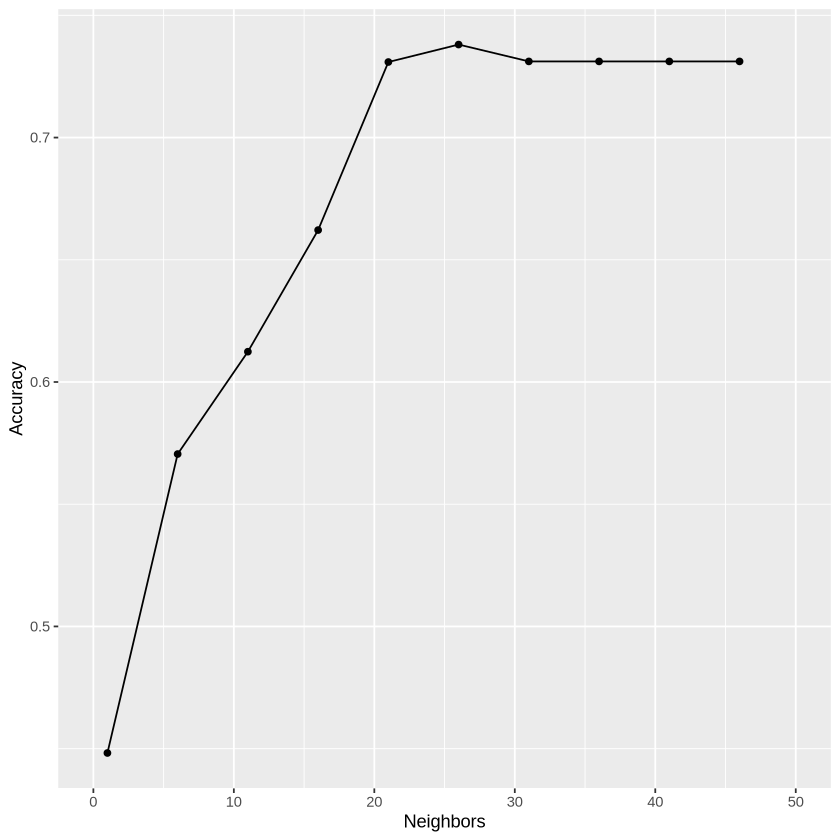

In [129]:
kneighbors1 <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors",
                     y = "Accuracy") +
                xlim(c(0, 50))
kneighbors1

Here we can see that picking 26 neighbors yields the highest accuracy of 73.80%. Quite inaccurate. Let see what accuracies will be yielded when we apply this tuned model with 26 neighbors on the testing data.

In [136]:
players_spec_test <- nearest_neighbor(weight_func = "rectangular", neighbors = 26) |>
                                    set_engine("kknn") |>
                                    set_mode("classification")
players_workflow <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec_test) |>
                    fit(data = players_training)

players_test_predictions <- predict(players_workflow, players_testing) |>
                            bind_cols(players_testing)
players_test_predictions


players_test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.pred_class,subscribe,played_hours,Age
<fct>,<fct>,<dbl>,<dbl>
YES,YES,0.0,17
YES,YES,0.1,17
YES,YES,0.0,17
YES,YES,1.5,25
YES,NO,0.0,22
YES,YES,0.3,8
YES,YES,0.0,17
YES,YES,0.7,21
YES,YES,0.0,17


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7346939


For our final conclusion, we can see that the accuracy has slightly decreased from 73.80% from the tuned model on the training set. Also quite an inaccurate discrepancy! Let's print a confusion matrix to see the exact metrics of what the model predicted right or wrong.

In [131]:
cm <- players_test_predictions |>
             conf_mat(truth = subscribe, estimate = .pred_class)
cm

          Truth
Prediction NO YES
       NO   0   0
       YES 13  36

In [ ]:
#################NEW EXP##################

In [137]:
players_split_85 <- initial_split(players_cleaner, prop = 0.85, strata = subscribe)
players_training_85 <- training(players_split_85)
players_testing_85 <- testing(players_split_85)


players_spec_85 <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn") |>
                set_mode("classification")

players_recipe <- recipe(subscribe ~ ., data = players_training) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

players_vfold_ <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

players_results_85 <- workflow() |>
                    add_recipe(players_recipe) |>
                    add_model(players_spec_85) |>
                    tune_grid(resamples = players_vfold, grid = k_vals ) |>
                    collect_metrics()

                    
accuracies_85 <- players_results_85 |>
                filter(.metric == "accuracy")
accuracies_85

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4482266,5,0.035788135,Preprocessor1_Model01
2,accuracy,binary,0.4551232,5,0.041051688,Preprocessor1_Model02
3,accuracy,binary,0.5562397,5,0.069663999,Preprocessor1_Model03
4,accuracy,binary,0.5907553,5,0.064307110,Preprocessor1_Model04
5,accuracy,binary,0.5705255,5,0.058137181,Preprocessor1_Model05
6,accuracy,binary,0.5705255,5,0.058137181,Preprocessor1_Model06
7,accuracy,binary,0.6197701,5,0.041794532,Preprocessor1_Model07
8,accuracy,binary,0.6540230,5,0.047753053,Preprocessor1_Model08
9,accuracy,binary,0.6190476,5,0.064882248,Preprocessor1_Model09


In [ ]:
#####CMT####

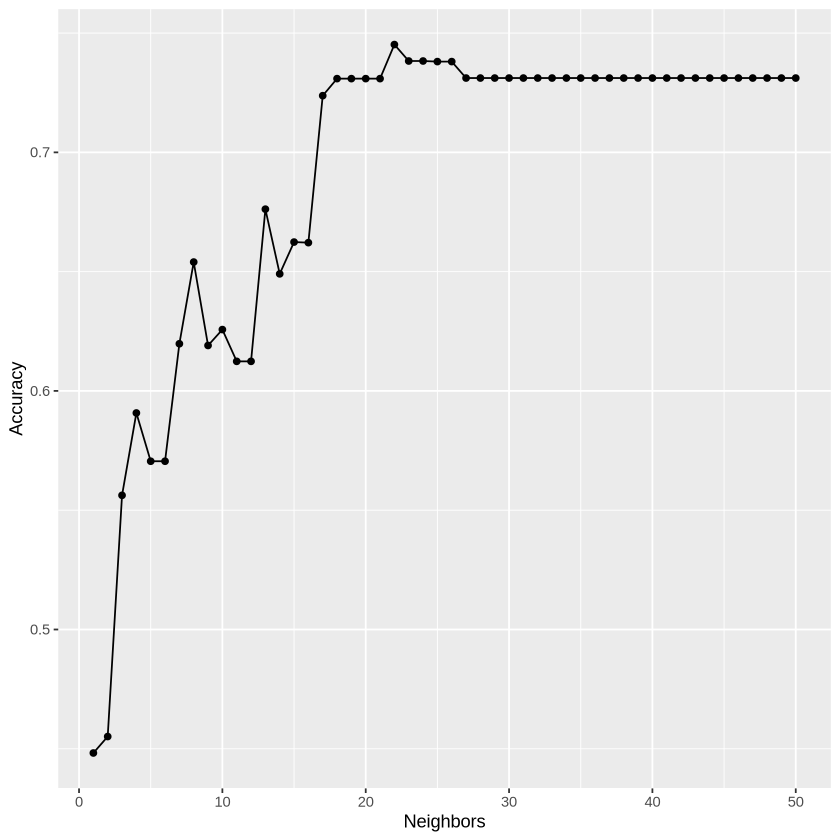

In [138]:
kneighbors2 <- ggplot(accuracies_85, aes(x = neighbors, y = mean)) +
                geom_point() +
                geom_line() +
                labs(x = "Neighbors",
                     y = "Accuracy")
kneighbors2